In [2]:
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [29]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()
print(train_images.shape,train_labels.shape)
print(train_images[0])

(60000, 28, 28) (60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

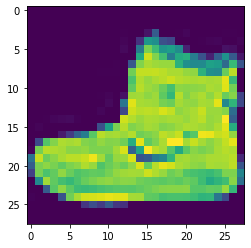

In [4]:
plt.figure()
plt.imshow(train_images[0])
#顏色條
plt.colorbar()
#用來顯示網格
plt.grid(False)

In [32]:
#透過tf.data，會更清楚、方便去描述資料流的處理過程 。
#在讀檔案的話，若您的data先讀好了，
#就可以使用像是tf.data.Dataset.from_tensors()或者 tf.data.Dataset.from_tensor_slices()
#，若還沒有的話就可以使用tf.data.TFRecordDataset()去讀File。

#上述中帶入兩個array是很重要的方式，因在大部份料集都會分features 和 labels
data = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
print(data)


<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>


AttributeError: 'TensorSliceDataset' object has no attribute 'shape'

In [12]:
def feature_scale(x,y):
  x = tf.cast(x,dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  return x,y

#接下來就是要何何從其中提取出來饋入模型中
#shuffle: 打亂，為一個size，每次取進此尺度的大小，再從其中取出
#batch: 批量，每次提取的樣本的數量
#repeat: 整個資料集要重覆提取幾次鎮
#map: 對映，可設一數學操作對映到所有資料集裡的樣本，如全部加 1
data = data.map(feature_scale).shuffle(10000).batch(128)
print(data)

<BatchDataset shapes: ((None, None, 28, 28), (None, None)), types: (tf.float32, tf.int32)>


TypeError: 'BatchDataset' object is not subscriptable

In [15]:
#資料迭代化，這是tf.data api的特色。建立Dataset -> 資料迭代化 -> 放進Model
data_iter = iter(data)
print(data_iter)
samples = next(data_iter)
print(samples)


(<tf.Tensor: id=215, shape=(128, 128, 28, 28), dtype=float32, numpy=
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 1.5378702e-05, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 1.5378702e-05, ...,
          0.0000000e+00, 0.0000000e+00, 0.0

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.relu)
])

model.build(input_shape=[None,28*28])

model.summary()
optimizer = optimizers.Adam(lr=1e-3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  200960    
_________________________________________________________________
dense_11 (Dense)             multiple                  32896     
_________________________________________________________________
dense_12 (Dense)             multiple                  8256      
_________________________________________________________________
dense_13 (Dense)             multiple                  2080      
_________________________________________________________________
dense_14 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [37]:
x,y = samples

print(x.shape)
print(y.shape)

(128, 128, 28, 28)
(128, 128)


In [39]:
y_one_hot = tf.one_hot(train_labels,depth=10)
print(y_one_hot.shape)
x= tf.reshape(train_images,[-1,28*28])

(60000, 10)


In [42]:
def run_optimization():
    with tf.GradientTape() as tape:
        #圖片匯入model

        logits = model(x)
        #将label索引转换成one-hot形式
        y_one_hot = tf.one_hot(train_labels,depth=10)
        #分類交叉墒函數
        loss = tf.losses.categorical_crossentropy(y_one_hot,logits,from_logits=True)
        #預設對所有的元素求平均
        loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))

In [53]:
#使用test_images做預測，目前只有跟Test_labels做equal，但看不出有訓練到甚麼，

total_loss=0
for step in range(1,60):
    run_optimization()
    if step % 20 ==0:
        test = tf.reshape(test_images,[-1,28*28])
        gd= model(test)
        prob = tf.nn.softmax(gd,axis=1)
        pred = tf.argmax(prob,axis=1)

        pred = tf.cast(pred,dtype=tf.int32)
        correct= tf.equal(pred,test_labels)
        print(correct)
        result = tf.reduce_sum(tf.cast(correct,dtype=tf.int32))
        total_loss += int(result)
        print(result)
        #test_loss,test_acc= model.evaluate(test_images,test_labels)
        #print("測試損失:%f,TEST ACC:%f"%(test_lostt,test_acc))

tf.Tensor([False False  True ... False  True  True], shape=(10000,), dtype=bool)
tf.Tensor(2857, shape=(), dtype=int32)
tf.Tensor([False False  True ... False  True  True], shape=(10000,), dtype=bool)
tf.Tensor(2859, shape=(), dtype=int32)
